In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
ds=xr.open_dataset('cache/sfei_wind/SFB_hourly_wind_and_met_data_2017.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:              (station: 52, time: 8760)
Coordinates:
  * time                 (time) float64 1.0 1.042 1.083 ... 365.9 365.9 366.0
Dimensions without coordinates: station
Data variables:
    station_name         (station) object ...
    station_backup       (station) object ...
    station_description  (station) object ...
    organization         (station) object ...
    latitude             (station) float64 ...
    longitude            (station) float64 ...
    anemometer_height    (station) float64 ...
    temperature_height   (station) float64 ...
    humidity_height      (station) float64 ...
    z0                   (station) float64 ...
    z0t                  (station) float64 ...
    z0q                  (station) float64 ...
    u                    (time, station) float64 ...
    v                    (time, station) float64 ...
    Ta                   (time, station) float64 ...
    Ts                   (time, station) float64 ...
    rh       

In [11]:
np.isnan(ds.u10).sum(dim='station') / len(ds.time)

<xarray.DataArray 'u10' (time: 8760)>
array([0.000685, 0.000685, 0.000685, ..., 0.001712, 0.001941, 0.001826])
Coordinates:
  * time     (time) float64 1.0 1.042 1.083 1.125 ... 365.8 365.9 365.9 366.0

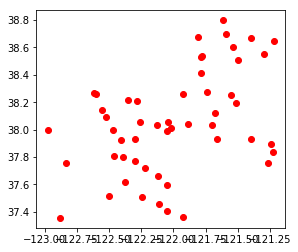

In [7]:
plt.figure()
plt.plot(ds.longitude, ds.latitude,'ro')
plt.gca().set_aspect(1./np.cos(ds.latitude.mean()))

In [16]:
import stompy.model.delft.io as dio
import six
six.moves.reload_module(dio)

dio.dfm_wind_to_nc('wind_natneighbor_WY2017.amu',
                   'wind_natneighbor_WY2017.amv',
                   'wind_natneighbor_WY2017.nc')

0 frames, 2017-01-01T00:00:00 most recent
96 frames, 2017-01-05T00:00:00 most recent
192 frames, 2017-01-09T00:00:00 most recent
288 frames, 2017-01-13T00:00:00 most recent
384 frames, 2017-01-17T00:00:00 most recent
480 frames, 2017-01-21T00:00:00 most recent
576 frames, 2017-01-25T00:00:00 most recent
672 frames, 2017-01-29T00:00:00 most recent
768 frames, 2017-02-02T00:00:00 most recent
864 frames, 2017-02-06T00:00:00 most recent
960 frames, 2017-02-10T00:00:00 most recent
1056 frames, 2017-02-14T00:00:00 most recent
1152 frames, 2017-02-18T00:00:00 most recent
1248 frames, 2017-02-22T00:00:00 most recent
1344 frames, 2017-02-26T00:00:00 most recent
1440 frames, 2017-03-02T00:00:00 most recent
1536 frames, 2017-03-06T00:00:00 most recent
1632 frames, 2017-03-10T00:00:00 most recent
1728 frames, 2017-03-14T00:00:00 most recent
1824 frames, 2017-03-18T00:00:00 most recent
1920 frames, 2017-03-22T00:00:00 most recent
2016 frames, 2017-03-26T00:00:00 most recent
2112 frames, 2017-03-30T

In [18]:
ds=xr.open_dataset('wind_natneighbor_WY2017.nc')

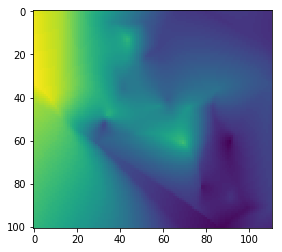

In [20]:
plt.figure()
plt.imshow(ds.wind_u.isel(time=0).values)

In [ ]:
from stompy.io.local import coamps
six.moves.reload_module(coamps)

coamps.fetch_coamps_wind(np.datetime64("2017-06-01"),
                         np.datetime64("2017-12-31"),
                         cache_dir='cache')
